In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_securities(after=None):
    query = 'query screen($limit:[SecurityLimitOptionInput!]!,$after:String){viewer{screenSecurities(filterTypes:EQUITY,limit:$limit,sort:{type:MARKET_CAP,direction:DESC},first:100,after:$after){pageInfo{hasNextPage,endCursor},edges{node{symbol}}}}}'
    variables = {'limit':[{'type':'MARKET_CAP','min':32000000000,'inclusive':True}],'after':after}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    cursor = r['data']['viewer']['screenSecurities']['pageInfo']['endCursor']
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenSecurities']['edges']], cursor
s1, after = screen_securities()
s2, after = screen_securities(after)
symbols = s1 + s2 + screen_securities(after)[0]
print(len(symbols))
quote = Quote(symbols, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
293
from 2019-05-20 to 2019-07-05 - 293


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0.2) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats

192


,len,mean,std,shrp,drawdown
Symbols,,,,,
DE,28,3.393783,2.612246,1.283991,1.623278
BHP,28,2.036161,1.747583,1.142422,4.002036
ILMN,28,3.521543,3.139181,1.109162,2.964856
DHR,28,1.732652,1.598744,1.058937,1.962006
RELX,28,1.175551,1.083954,1.047894,1.928484
BBL,28,2.129932,2.111947,0.989727,4.709520
RACE,28,2.578097,2.771643,0.915852,1.670678
WMT,28,1.622375,1.735541,0.911930,1.198009
BSX,28,2.259464,2.485825,0.892976,2.484928


evicted SNE 0.8275023554570718
evicted LVS 0.8602438589555088
evicted TEF 0.8753734396319117
evicted CP 0.8947616941496161
evicted ORAN 0.8534339220615852
evicted VOD 0.7790431680426768
evicted ATVI 0.7538941900445157
evicted AABA 0.891435146136007
evicted NVDA 0.8995107045915542
evicted ORCL 0.8654766527164424
evicted VFC 0.87685570090197
evicted WM 0.8943690922737364
evicted QCOM 0.896328101676757
evicted ROST 0.8721996372432365
evicted TSM 0.7939632368470577
evicted GM 0.8998877709398261
evicted DAL 0.8703678876309747
evicted LYB 0.8046253336051168
evicted WBA 0.8500165448993157
evicted DD 0.7947673549493091
evicted TXN 0.8956328648389508
evicted MAR 0.8756220417918774
evicted BAX 0.8882762756873637
evicted AMZN 0.8387067818564096
evicted CI 0.8858595216335956
evicted SNY 0.8899758890742601
evicted TRV 0.8724975915597697
evicted TD 0.8230503354710176
evicted PLD 0.8953496143724938
evicted UPS 0.8716164234017196
evicted AON 0.8575532583339613
evicted GE 0.8921000566859372
evicted JD 

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,28.0,1.914548,0.507641,1.001464,1.593010,1.878054,2.219606,2.841868,3.693288,0.793879
HD,28.0,1.858329,2.323792,-2.076541,-0.687380,2.134818,4.262738,5.206084,0.782620,3.081654
BBD,28.0,2.872164,3.913564,-4.175362,0.558987,2.946306,5.110898,11.071861,0.723760,4.374995
TGT,28.0,2.500010,3.833346,-2.379332,-0.471726,1.627697,4.122972,12.056041,0.641823,3.069090
JCI,28.0,1.339400,2.028794,-3.140038,-0.520173,1.782046,2.982688,4.679410,0.640636,3.140038
RIO,28.0,0.897747,2.571218,-3.066992,-1.469732,0.386154,3.056791,6.173475,0.333719,5.774361
AGN,28.0,4.400669,13.540307,-12.250016,-4.686634,1.580169,9.076500,34.640247,0.322074,17.045367
FB,28.0,1.263039,5.063867,-9.339448,-1.290627,1.436243,5.414971,8.116913,0.241585,11.423490


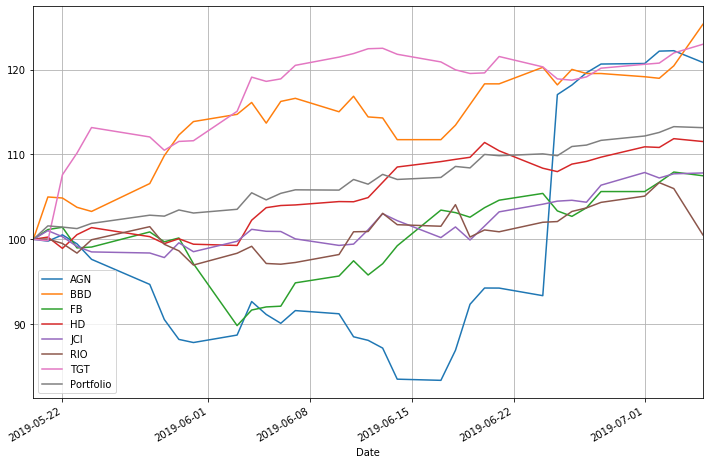

In [3]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio()
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)